## Momentum:

### Classical / Polyak momentum
We discussed about the importance of learning rates and need for annealing the learning rates with Stochastic Gradient Descent. SGD is a convex optimization technique and it converges to stationary point. A stationary point may not be a convergence point for every problem. A solution space with sparse gradients will have a type of stationary points called saddle points. Saddle points are points with very low gradient or near zero gradient for few iterations and high gradients after that. 

This problem can be solved by updating parameters with a historical average of the gradients instead of the current gradient. Momentum update is calculated by taking a portion of the previous momentum and subtracting the current gradient (scaled by learning rate) from it. an equation for regular momentum update is shown below.
$$v_{t+1} = \mu v_t - \eta f'(\theta _t)$$
$$\theta _{t+1} = \theta _t + v_{t+1}$$

$v_t$ is the momentum update in the previous time step and $\theta _t$ is the current gradient. $\eta$ is the learning rate and $\mu$ is the momentum coefficient. If you consider previous momentum as a vector and currect gradient as another vector, we are adjusting the direction of the momentum vector using the current gradient.

### Nestrov Accelerated Gradient(NAG)
Nestrov Accelerated Gradient/Nestrov Momentum is another type of momentum update which is highly used. In polyak momentum we calculated the gradient and then adjusted the momentum with the gradient. However in Nestrov momentum we adjust the gradient before calculating the momentum. Nestrov Momentum can be respresented mathematically using the following equations:
$$v_{t+1} = \mu v_t - \eta f'(\theta _t + \mu v_t)$$
$$\theta _{t+1} = \theta _t + v_{t+1}$$

## Momentum in YANN:
YANN supports Polyak and Nestrov momentum. Momentum can be added to the network using the following

optimizer_params =  {         

        "momentum_type"   : <option>  'false' <no momentum>, 'polyak', 'nesterov'.
        "momentum_params" : (<option in range [0,1]>, <option in range [0,1]>, <int>)
        "optimizer_type" : <option>, 'sgd', 'adagrad', 'rmsprop', 'adam'.
        "id"        : id of the optimizer
            } 
***`momentum_type`*** is the type of momentum(polyak/nestrov) to be used. If you don't want to use any momentum you can give false to it. The default value for momentum_type is false. ***`momentum_params`*** is a 3 tuple and takes values for momentum coeffient at start,at end, at what epoch to end momentum increase and it takes a default value of (0.5, 0.95,50). ***`Optimizer_type`*** is the type of the optimizer to be used. YANN supports sgd, adagrad, rmsprop and adam. We discussed about sgd in the previous tutorial and we will discuss other optimizers later in this chapter.

Let's use the MLP network we created in the previous tutorial and train it with no momentum, polak momentum and nestrov momentum and analyze the results

In [1]:
from yann.network import network
from yann.special.datasets import cook_mnist
import matplotlib.pyplot as plt

def get_cost():
    costs = []
    with open('./resultor/costs.txt') as costf:
        costs = [float(cost.rstrip()) for cost in costf]
    return costs

def plot_costs(costs, labels):
    for cost, label in zip(costs, labels):
        plt.plot(cost,label=label)
    plt.legend()
    plt.show()
    
costs = []

data = cook_mnist()
dataset_params  = { "dataset": data.dataset_location(), "id": 'mnist', "n_classes" : 10 }
def mlp(dataset_params, optimizer_params, optimizer_id):
    net = network()
    net.add_layer(type = "input", id ="input", dataset_init_args = dataset_params)
    net.add_layer (type = "dot_product",
                   origin ="input",
                   id = "dot_product_1",
                   num_neurons = 800,
                   regularize = True,
                   activation ='relu')

    net.add_layer (type = "dot_product",
                   origin ="dot_product_1",
                   id = "dot_product_2",
                   num_neurons = 800,
                   regularize = True,
                   activation ='relu')
    net.add_layer ( type = "classifier",
                    id = "softmax",
                    origin = "dot_product_2",
                    num_classes = 10,
                    activation = 'softmax',
                    )

    net.add_layer ( type = "objective",
                    id = "nll",
                    origin = "softmax",
                    )
    
    net.add_module ( type = 'optimizer', params = optimizer_params )
    learning_rates = (0.05, 0.01, 0.001)
    net.cook( verbose = 0,
             optimizer = optimizer_id,
              objective_layer = 'nll',
              datastream = 'mnist',
              classifier = 'softmax',
              )
    net.train(verbose=0,
              epochs = (20, 20),
           validate_after_epochs = 2,
           training_accuracy = True,
           learning_rates = learning_rates,
           show_progress = True,
           early_terminate = True)
    return net

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 750 Ti (CNMeM is enabled with initial size: 40.0% of memory, cuDNN 5110)


. Setting up dataset 
.. setting up skdata
... Importing mnist from skdata
.. setting up dataset
.. training data
.. validation data 
.. testing data 
. Dataset 31400 is created.
. Time taken is 0.744573 seconds


The above function returns a trained network given the dataset_params and optimizer_params. Let's train this network without any momentum

In [2]:
optimizer_params =  {
                "momentum_type"       : 'false',
                "momentum_params"     : (0.9, 0.95, 30),
                "regularization"      : (0.0001, 0.0002),
                "optimizer_type"      : 'sgd',
                "id"                  : 'sgd'
                        }
net = mlp(dataset_params, optimizer_params, 'sgd')
costs.append(get_cost())

. Initializing the network
.. Adding input layer input
.. Adding dot_product layer dot_product_1
.. Adding flatten layer 2
.. Adding dot_product layer dot_product_2
.. Adding classifier layer softmax
.. Adding objective layer nll
.. Setting up the optimizer


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.30127
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 2.29778
... Learning Rate       : 0.00949999969453
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.29398
... Learning Rate       : 0.00902500003576
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 2.28946
... Learning Rate       : 0.00857375003397
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.28381
... Learning Rate       : 0.00814506225288
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 2.2765
... Learning Rate       : 0.0077378093265
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.26685
... Learning Rate       : 0.00735091883689
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 2.25397
... Learning Rate       : 0.00698337284848
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.23664
... Learning Rate       : 0.00663420418277
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 2.21336
... Learning Rate       : 0.00630249409005
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.1823
... Learning Rate       : 0.0059873694554
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 2.1417
... Learning Rate       : 0.00568800093606
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.09033
... Learning Rate       : 0.00540360109881
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 2.02778
... Learning Rate       : 0.00513342116028
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.95414
... Learning Rate       : 0.0048767500557
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 1.86968
... Learning Rate       : 0.0046329125762
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.77546
... Learning Rate       : 0.00440126704052
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 1.67421
... Learning Rate       : 0.00418120389804
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.57048
... Learning Rate       : 0.00397214386612
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 1.46945
... Learning Rate       : 0.00377353676595
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.50512
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 1.47964
... Learning Rate       : 0.000950000016019
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.45555
... Learning Rate       : 0.000902500003576
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 1.43283
... Learning Rate       : 0.000857374980114
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.41144
... Learning Rate       : 0.000814506202005
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 1.39134
... Learning Rate       : 0.000773780862801
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.37249
... Learning Rate       : 0.000735091802198
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 1.35481
... Learning Rate       : 0.000698337214999
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.33825
... Learning Rate       : 0.00066342036007
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 1.32274
... Learning Rate       : 0.000630249327514
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.30823
... Learning Rate       : 0.000598736864049
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 1.29465
... Learning Rate       : 0.000568800023757
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.28194
... Learning Rate       : 0.000540359993465
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 1.27004
... Learning Rate       : 0.00051334197633
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.25891
... Learning Rate       : 0.000487674871692
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 1.24848
... Learning Rate       : 0.000463291129563
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.23872
... Learning Rate       : 0.000440126575995
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 1.22957
... Learning Rate       : 0.000418120238464
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.22099
... Learning Rate       : 0.000397214229451
... Momentum            : None


.. Cost                : 1.21295
... Learning Rate       : 0.000377353513613
... Momentum            : None


| training  100% Time: 0:00:00                                                 


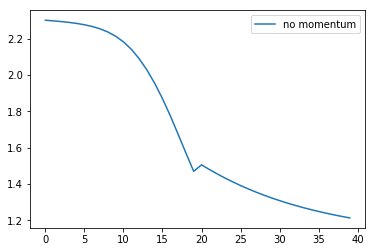

In [3]:
labels = ['no momentum']
plot_costs(costs, labels)

Let's train the same network with polyak momentum

In [4]:
optimizer_params =  {
                "momentum_type"       : 'polyak',
                "momentum_params"     : (0.9, 0.95, 30),
                "regularization"      : (0.0001, 0.0002),
                "optimizer_type"      : 'sgd',
                "id"                  : 'sgd-polyak'
                        }
net = mlp(dataset_params, optimizer_params, 'sgd-polyak')
costs.append(get_cost())

. Initializing the network
.. Adding input layer input
.. Adding dot_product layer dot_product_1
.. Adding flatten layer 2
.. Adding dot_product layer dot_product_2
.. Adding classifier layer softmax
.. Adding objective layer nll
.. Setting up the optimizer


| training  100% Time: 0:00:00                                                 


.. Cost                : 2.27479
... Learning Rate       : 0.00999999977648
... Momentum            : 0.899999976158



| training  100% Time: 0:00:00                                                 


.. Cost                : 1.56053
... Learning Rate       : 0.00949999969453
... Momentum            : 0.901666641235


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.630191
... Learning Rate       : 0.00902500003576
... Momentum            : 0.903333306313


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.456963
... Learning Rate       : 0.00857375003397
... Momentum            : 0.90499997139


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.394291
... Learning Rate       : 0.00814506225288
... Momentum            : 0.906666636467


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.361004
... Learning Rate       : 0.0077378093265
... Momentum            : 0.908333301544


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.337403
... Learning Rate       : 0.00735091883689
... Momentum            : 0.909999966621


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.317819
... Learning Rate       : 0.00698337284848
... Momentum            : 0.911666631699


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.300565
... Learning Rate       : 0.00663420418277
... Momentum            : 0.91333335638


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.284945
... Learning Rate       : 0.00630249409005
... Momentum            : 0.914999961853


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.270672
... Learning Rate       : 0.0059873694554
... Momentum            : 0.91666662693


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.257467
... Learning Rate       : 0.00568800093606
... Momentum            : 0.918333292007


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.245283
... Learning Rate       : 0.00540360109881
... Momentum            : 0.919999957085


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.234036
... Learning Rate       : 0.00513342116028
... Momentum            : 0.921666622162


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.223667
... Learning Rate       : 0.0048767500557
... Momentum            : 0.923333287239


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.214116
... Learning Rate       : 0.0046329125762
... Momentum            : 0.924999952316


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.20537
... Learning Rate       : 0.00440126704052
... Momentum            : 0.926666617393


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.197398
... Learning Rate       : 0.00418120389804
... Momentum            : 0.928333282471


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.190121
... Learning Rate       : 0.00397214386612
... Momentum            : 0.929999947548


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.183463
... Learning Rate       : 0.00377353676595
... Momentum            : 0.931666612625


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.182799
... Learning Rate       : 0.0010000000475
... Momentum            : 0.933333277702


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.180513
... Learning Rate       : 0.000950000016019
... Momentum            : 0.93499994278


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.17883
... Learning Rate       : 0.000902500003576
... Momentum            : 0.936666607857


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.177257
... Learning Rate       : 0.000857374980114
... Momentum            : 0.938333272934


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.175754
... Learning Rate       : 0.000814506202005
... Momentum            : 0.939999938011


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.174313
... Learning Rate       : 0.000773780862801
... Momentum            : 0.941666603088


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.172926
... Learning Rate       : 0.000735091802198
... Momentum            : 0.943333268166


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.17159
... Learning Rate       : 0.000698337214999
... Momentum            : 0.944999933243


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.170301
... Learning Rate       : 0.00066342036007
... Momentum            : 0.94666659832


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.169057
... Learning Rate       : 0.000630249327514
... Momentum            : 0.948333263397


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.167853
... Learning Rate       : 0.000598736864049
... Momentum            : 0.949999928474


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.166683
... Learning Rate       : 0.000568800023757
... Momentum            : 0.949999988079


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.165579
... Learning Rate       : 0.000540359993465
... Momentum            : 0.949999988079


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.164541
... Learning Rate       : 0.00051334197633
... Momentum            : 0.949999988079


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.163565
... Learning Rate       : 0.000487674871692
... Momentum            : 0.949999988079


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.162645
... Learning Rate       : 0.000463291129563
... Momentum            : 0.949999988079


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.161776
... Learning Rate       : 0.000440126575995
... Momentum            : 0.949999988079


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.160957
... Learning Rate       : 0.000418120238464
... Momentum            : 0.949999988079


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.160183
... Learning Rate       : 0.000397214229451
... Momentum            : 0.949999988079


.. Cost                : 0.159452
... Learning Rate       : 0.000377353513613
... Momentum            : 0.949999988079


| training  100% Time: 0:00:00                                                 


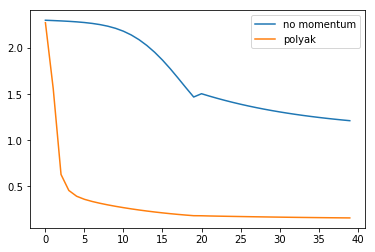

In [5]:
labels = ['no momentum', 'polyak']
plot_costs(costs, labels)

Let's train the same network with Nestrov momentum

In [6]:
optimizer_params =  {
                "momentum_type"       : 'nesterov',
                "momentum_params"     : (0.9, 0.95, 30),
                "regularization"      : (0.0001, 0.0002),
                "optimizer_type"      : 'sgd',
                "id"                  : 'sgd-nesterov'
                        }
net = mlp(dataset_params, optimizer_params, 'sgd-nesterov')
costs.append(get_cost())

. Initializing the network
.. Adding input layer input
.. Adding dot_product layer dot_product_1
.. Adding flatten layer 2
.. Adding dot_product layer dot_product_2
.. Adding classifier layer softmax
.. Adding objective layer nll
.. Setting up the optimizer


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.27447
... Learning Rate       : 0.00999999977648
... Momentum            : 0.899999976158


| training  100% Time: 0:00:00                                                 


.. Cost                : 1.5333
... Learning Rate       : 0.00949999969453
... Momentum            : 0.901666641235


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.628792
... Learning Rate       : 0.00902500003576
... Momentum            : 0.903333306313


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.456023
... Learning Rate       : 0.00857375003397
... Momentum            : 0.90499997139


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.393798
... Learning Rate       : 0.00814506225288
... Momentum            : 0.906666636467


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.361185
... Learning Rate       : 0.0077378093265
... Momentum            : 0.908333301544


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.338061
... Learning Rate       : 0.00735091883689
... Momentum            : 0.909999966621


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.319009
... Learning Rate       : 0.00698337284848
... Momentum            : 0.911666631699


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.302319
... Learning Rate       : 0.00663420418277
... Momentum            : 0.91333335638


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.287134
... Learning Rate       : 0.00630249409005
... Momentum            : 0.914999961853


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.273162
... Learning Rate       : 0.0059873694554
... Momentum            : 0.91666662693


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.260377
... Learning Rate       : 0.00568800093606
... Momentum            : 0.918333292007


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.248669
... Learning Rate       : 0.00540360109881
... Momentum            : 0.919999957085


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.237936
... Learning Rate       : 0.00513342116028
... Momentum            : 0.921666622162


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.228102
... Learning Rate       : 0.0048767500557
... Momentum            : 0.923333287239


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.219055
... Learning Rate       : 0.0046329125762
... Momentum            : 0.924999952316


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.210739
... Learning Rate       : 0.00440126704052
... Momentum            : 0.926666617393


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.203073
... Learning Rate       : 0.00418120389804
... Momentum            : 0.928333282471


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.195979
... Learning Rate       : 0.00397214386612
... Momentum            : 0.929999947548


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.189424
... Learning Rate       : 0.00377353676595
... Momentum            : 0.931666612625


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.188874
... Learning Rate       : 0.0010000000475
... Momentum            : 0.933333277702


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.186823
... Learning Rate       : 0.000950000016019
... Momentum            : 0.93499994278


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.18515
... Learning Rate       : 0.000902500003576
... Momentum            : 0.936666607857


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.183576
... Learning Rate       : 0.000857374980114
... Momentum            : 0.938333272934


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.182069
... Learning Rate       : 0.000814506202005
... Momentum            : 0.939999938011


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.18062
... Learning Rate       : 0.000773780862801
... Momentum            : 0.941666603088


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.179225
... Learning Rate       : 0.000735091802198
... Momentum            : 0.943333268166


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.177878
... Learning Rate       : 0.000698337214999
... Momentum            : 0.944999933243


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.176575
... Learning Rate       : 0.00066342036007
... Momentum            : 0.94666659832


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.175312
... Learning Rate       : 0.000630249327514
... Momentum            : 0.948333263397


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.174088
... Learning Rate       : 0.000598736864049
... Momentum            : 0.949999928474


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.1729
... Learning Rate       : 0.000568800023757
... Momentum            : 0.949999988079


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.171779
... Learning Rate       : 0.000540359993465
... Momentum            : 0.949999988079


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.170724
... Learning Rate       : 0.00051334197633
... Momentum            : 0.949999988079


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.16973
... Learning Rate       : 0.000487674871692
... Momentum            : 0.949999988079


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.168793
... Learning Rate       : 0.000463291129563
... Momentum            : 0.949999988079


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.167908
... Learning Rate       : 0.000440126575995
... Momentum            : 0.949999988079


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.167074
... Learning Rate       : 0.000418120238464
... Momentum            : 0.949999988079


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.166285
... Learning Rate       : 0.000397214229451
... Momentum            : 0.949999988079


.. Cost                : 0.16554
... Learning Rate       : 0.000377353513613
... Momentum            : 0.949999988079


| training  100% Time: 0:00:00                                                 


In [ ]:
labels = ['no momentum', 'polyak', 'nesterov']
plot_costs(costs, labels)

If you see the plot above you can observe that polyak and nesterov momentum helped to converge faster compared to the one with no momentum. In particular example, polyak and nesterov performed similarly. Hoewever in general nesterov performs better and is more stable.

#### Need for a new optimizer:
Momentum solves the saddle point problem by adding a temporal average of the previous updates. One problem with momentum is that it accelerates the gradients for every direction(dimension). Imagine a scenario where we need have the minimum in the direction where we have less gradients and high gradients in other direction. Using momentum makes it faster in other direction and it maintains the slow pace in the direction we actually need to move.   

## Adagrad

Adagrad is another optimizer we are borrowing from convex optimization. Adagrad promises convergence given a convex setting. We have learnt few optimization techniques before. If you recall, we used same learning rate for all parameters. Adagrad adapts the learning rate per parameter. Parameter update in Adagrad is done using the following equation.
$$\theta _{j} = \theta _j +  \frac{\eta}{\sqrt{G_{j,j}}} g_j$$

The above equation has only one new component $\sqrt{G_{j,j}}$. $G_{j,j}$ is the sum of the squares of the previous gradients. This term acts as a smoothing factor.  If the gradient is constantly high in a direction then $G_{j,j}$ is also high which reduces the overall learning rate in that direction and vice versa.

Let's try the previous example using Adagrad.

In [8]:
optimizer_params =  {
                "momentum_type"       : 'false',
                "regularization"      : (0.0001, 0.0002),
                "optimizer_type"      : 'adagrad',
                "id"                  : 'adagrad'
                        }
net = mlp(dataset_params, optimizer_params, 'adagrad')
costs.append(get_cost())

. Initializing the network
.. Adding input layer input
.. Adding dot_product layer dot_product_1
.. Adding flatten layer 2
.. Adding dot_product layer dot_product_2
.. Adding classifier layer softmax
.. Adding objective layer nll
.. Setting up the optimizer


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.524895
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.15146
... Learning Rate       : 0.00949999969453
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.10481
... Learning Rate       : 0.00902500003576
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0799246
... Learning Rate       : 0.00857375003397
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.063727
... Learning Rate       : 0.00814506225288
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0521991
... Learning Rate       : 0.0077378093265
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.043717
... Learning Rate       : 0.00735091883689
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0372449
... Learning Rate       : 0.00698337284848
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0322198
... Learning Rate       : 0.00663420418277
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0281588
... Learning Rate       : 0.00630249409005
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0248669
... Learning Rate       : 0.0059873694554
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0221508
... Learning Rate       : 0.00568800093606
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0199184
... Learning Rate       : 0.00540360109881
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0180428
... Learning Rate       : 0.00513342116028
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0164617
... Learning Rate       : 0.0048767500557
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0150964
... Learning Rate       : 0.0046329125762
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0139218
... Learning Rate       : 0.00440126704052
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0129141
... Learning Rate       : 0.00418120389804
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0120349
... Learning Rate       : 0.00397214386612
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0112718
... Learning Rate       : 0.00377353676595
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0148587
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0143665
... Learning Rate       : 0.000950000016019
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0140917
... Learning Rate       : 0.000902500003576
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0138617
... Learning Rate       : 0.000857374980114
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0136585
... Learning Rate       : 0.000814506202005
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0134721
... Learning Rate       : 0.000773780862801
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0133028
... Learning Rate       : 0.000735091802198
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0131459
... Learning Rate       : 0.000698337214999
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0130013
... Learning Rate       : 0.00066342036007
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0128673
... Learning Rate       : 0.000630249327514
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0127432
... Learning Rate       : 0.000598736864049
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0126275
... Learning Rate       : 0.000568800023757
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0125197
... Learning Rate       : 0.000540359993465
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0124198
... Learning Rate       : 0.00051334197633
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.012326
... Learning Rate       : 0.000487674871692
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.012238
... Learning Rate       : 0.000463291129563
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0121567
... Learning Rate       : 0.000440126575995
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0120794
... Learning Rate       : 0.000418120238464
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0120076
... Learning Rate       : 0.000397214229451
... Momentum            : None


.. Cost                : 0.0119412
... Learning Rate       : 0.000377353513613
... Momentum            : None


| training  100% Time: 0:00:00                                                 


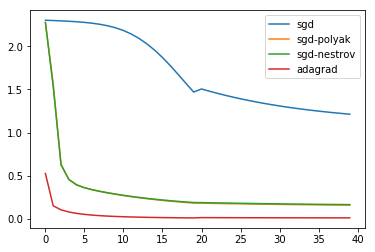

In [9]:
labels = ['sgd','sgd-polyak','sgd-nestrov', 'adagrad']
plot_costs(costs, labels)

The above plot shows a comparison between sgd(with momentum) and adagrad where adagrad converged significantly faster compared to other algorithms. You can use polyak and nestrov momentum with Agadrad.

#### Problem with Adagrad:

We saw that the Agadrad got all those nice features from the denominator term $\sqrt{G_{j,j}}$. $G_{j,j}$. However, this term increases with time consequently, learning rate reduces with time. It can reach a point where through the gradient is high, low learning rate can stop the learning. In simple term Adagrad forces the convergence. Therefore this technique is not immune to Saddle point problem. Let's look at the most popular neural network training technique.

## RMSPROP

rmsprop algorithm is proposed by Hinton which solves teh adagrad problem of forced convergence by taking weighted average of historical gradients so that the current update is only impacted by the past few gradients unlike every past gradient in Adagrad.
$$H_t = \gamma H_{t-1} + (1-\gamma )g_j^2$$
$$\theta _{j} = \theta _j +  \frac{\eta}{\sqrt{H_t}} g_j$$
In the above equations $\gamma$ is called the forgetting factor because scales down the $H_{t-1}$, the historical gradient. As the historical gradient is scaled down using this forgetting factor it is immune to saddle points. As rmsprop implements weighted historic average it is also not affected much by sudden changes in the gradient. Therefore it is works well with on-line and non-stationary optimization settings.

Let's see rmsprop in action:

In [10]:
optimizer_params =  {
                "momentum_type"       : 'false',
                "regularization"      : (0.0001, 0.0002),
                "optimizer_type"      : 'rmsprop',
                "id"                  : 'rmsprop'
                        }
net = mlp(dataset_params, optimizer_params, 'rmsprop')
costs.append(get_cost())

. Initializing the network
.. Adding input layer input
.. Adding dot_product layer dot_product_1
.. Adding flatten layer 2
.. Adding dot_product layer dot_product_2
.. Adding classifier layer softmax
.. Adding objective layer nll
.. Setting up the optimizer


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.20843
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.238489
... Learning Rate       : 0.00949999969453
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.154087
... Learning Rate       : 0.00902500003576
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.119845
... Learning Rate       : 0.00857375003397
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0900585
... Learning Rate       : 0.00814506225288
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0730993
... Learning Rate       : 0.0077378093265
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0601007
... Learning Rate       : 0.00735091883689
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0492536
... Learning Rate       : 0.00698337284848
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0413557
... Learning Rate       : 0.00663420418277
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0336751
... Learning Rate       : 0.00630249409005
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0306382
... Learning Rate       : 0.0059873694554
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0229147
... Learning Rate       : 0.00568800093606
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.019978
... Learning Rate       : 0.00540360109881
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0160781
... Learning Rate       : 0.00513342116028
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0136931
... Learning Rate       : 0.0048767500557
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0103865
... Learning Rate       : 0.0046329125762
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.00864367
... Learning Rate       : 0.00440126704052
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0072419
... Learning Rate       : 0.00418120389804
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.00568823
... Learning Rate       : 0.00397214386612
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.00494935
... Learning Rate       : 0.00377353676595
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.00403446
... Learning Rate       : 0.0010000000475
... Momentum            : None


| validation  100% Time: 0:00:00                                               
| training  100% Time: 0:00:00                                                 


.. Cost                : 0.00157265
... Learning Rate       : 0.000950000016019
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.000873975
... Learning Rate       : 0.000902500003576
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.000544938
... Learning Rate       : 0.000857374980114
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.000377974
... Learning Rate       : 0.000814506202005
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.000280538
... Learning Rate       : 0.000773780862801
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.000221617
... Learning Rate       : 0.000735091802198
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.000184564
... Learning Rate       : 0.000698337214999
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.00015988
... Learning Rate       : 0.00066342036007
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.000142023
... Learning Rate       : 0.000630249327514
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.000128341
... Learning Rate       : 0.000598736864049
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.000117554
... Learning Rate       : 0.000568800023757
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.000109164
... Learning Rate       : 0.000540359993465
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.000102014
... Learning Rate       : 0.00051334197633
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 9.62023e-05
... Learning Rate       : 0.000487674871692
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 9.1159e-05
... Learning Rate       : 0.000463291129563
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 8.69486e-05
... Learning Rate       : 0.000440126575995
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 8.32499e-05
... Learning Rate       : 0.000418120238464
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 8.00483e-05
... Learning Rate       : 0.000397214229451
... Momentum            : None


.. Cost                : 7.72281e-05
... Learning Rate       : 0.000377353513613
... Momentum            : None


| training  100% Time: 0:00:00                                                 


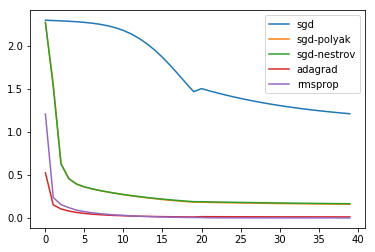

In [11]:
labels = ['sgd','sgd-polyak','sgd-nestrov', 'adagrad','rmsprop']
plot_costs(costs, labels)

Above plot shows that rmsprop reaches convergence marginally faster compared to adagrad. 

##### Need for a new Optimizer
We have rmsprop that works well in on-line and non-stationary optimization setting ang we have adagrad that works well with sparse gradients. What if we have a single algorithm that achieves both? we are going to learn about an optimizer that achieves both in the next section

## Adam
Adam is relatively new algorithm. It got published in 2015. Adam is immune to sparse gradients and non-stationary optimization techniques. It has automatic annealing, It adapts learning rate to each parameter. Let's see the mathematics behind adam.

moment calculation:
$$m_t = \beta_1 m_{t-1} + (1-\beta_1 )g_t$$
$$v_t = \beta_2 v_{t-1} + (1-\beta_2 )g_t^2$$

Bias Update:
$$\hat{m_t} = \frac{m_t}{1-\beta_1^t}$$
$$\hat{v_t} = \frac{v_t}{1-\beta_2^t}$$

Parameter update:
$$\theta _{t+1} = \theta _t +  \frac{\eta}{\sqrt{\hat{v_t}} + \epsilon } \hat{m_t}$$

As shown above adam has three steps ie., moment calculation, bias update and parameter update. In the moment calculation step, adam calculates first order and second order moments. first order moment is the temporal weighted average of the historical gradients and the second order moment is the temporal weighted average of square of historical gradients. $\beta _1$ and $\beta _2$ are coefficients similar to forgetting factor in rmsprop and they are close to 1. Authors who proposed this technique suggested to use 0.9 for $\beta _1$ and 0.999 for $\beta _2$. Therefore, $\beta _1$ and $\beta _2$ makes $m_t$ and $v_t$ biased towards the historical average because the weight $1-\beta_1$ and $1-\beta_2$ for the current gradient is near to zero. 
At the start of the learning $m_0$ = 0; $v_0$ = 0 which makes the updates biased to zero. Therefore to correct that we use that bias correction term. AS $\beta _1$ < 1 after few iterations $\beta_1^t \approx$ 0 and the bias correction will not effect the moments. Parameter update is equivalent to rmpsprop with polyak momentum becase first order moment is equivalent to polyak momentum and the second order moment is the denominator term in rms prop are same.  $\epsilon$ is a small constand used to prevent divide-by-zero disaster.

Let's see Adam in Action:

In [13]:
optimizer_params =  {
                "momentum_type"       : 'false',
                "regularization"      : (0.0001, 0.0002),
                "optimizer_type"      : 'adam',
                "id"                  : 'adam'
                        }
net = mlp(dataset_params, optimizer_params, 'adam')
costs.append(get_cost())

. Initializing the network
.. Adding input layer input
.. Adding dot_product layer dot_product_1
.. Adding flatten layer 2
.. Adding dot_product layer dot_product_2
.. Adding classifier layer softmax
.. Adding objective layer nll
.. Setting up the optimizer


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.362432
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.111809
... Learning Rate       : 0.00949999969453
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0835949
... Learning Rate       : 0.00902500003576
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0682858
... Learning Rate       : 0.00857375003397
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0574818
... Learning Rate       : 0.00814506225288
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0465513
... Learning Rate       : 0.0077378093265
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0432484
... Learning Rate       : 0.00735091883689
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0470485
... Learning Rate       : 0.00698337284848
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0377975
... Learning Rate       : 0.00663420418277
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0332297
... Learning Rate       : 0.00630249409005
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0302726
... Learning Rate       : 0.0059873694554
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0214966
... Learning Rate       : 0.00568800093606
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0180245
... Learning Rate       : 0.00540360109881
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.0147772
... Learning Rate       : 0.00513342116028
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0176706
... Learning Rate       : 0.0048767500557
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.00960995
... Learning Rate       : 0.0046329125762
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.00998307
... Learning Rate       : 0.00440126704052
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.00991542
... Learning Rate       : 0.00418120389804
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.0085059
... Learning Rate       : 0.00397214386612
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.00414123
... Learning Rate       : 0.00377353676595
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.00353667
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.000711566
... Learning Rate       : 0.000950000016019
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.000402329
... Learning Rate       : 0.000902500003576
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.000323398
... Learning Rate       : 0.000857374980114
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.000276283
... Learning Rate       : 0.000814506202005
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.000242125
... Learning Rate       : 0.000773780862801
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.000216403
... Learning Rate       : 0.000735091802198
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.000195929
... Learning Rate       : 0.000698337214999
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.000179242
... Learning Rate       : 0.00066342036007
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.000165267
... Learning Rate       : 0.000630249327514
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.000153327
... Learning Rate       : 0.000598736864049
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.000142855
... Learning Rate       : 0.000568800023757
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.000134077
... Learning Rate       : 0.000540359993465
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.00012608
... Learning Rate       : 0.00051334197633
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.000118993
... Learning Rate       : 0.000487674871692
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.000112693
... Learning Rate       : 0.000463291129563
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.000107024
... Learning Rate       : 0.000440126575995
... Momentum            : None


| training  100% Time: 0:00:00                                                 


.. Cost                : 0.000101824
... Learning Rate       : 0.000418120238464
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 9.72436e-05
... Learning Rate       : 0.000397214229451
... Momentum            : None


.. Cost                : 9.2925e-05
... Learning Rate       : 0.000377353513613
... Momentum            : None


| training  100% Time: 0:00:00                                                 


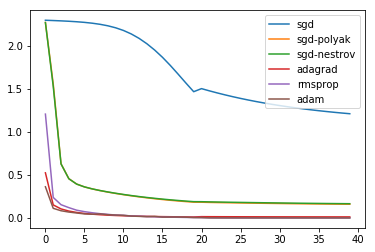

In [14]:
labels = ['sgd','sgd-polyak','sgd-nestrov', 'adagrad','rmsprop','adam']
plot_costs(costs, labels)

The above plot shows that adam performs slightly better compared to rmsprop. 

To conclude this discussion of optimizers, this tutorial follows a path for introducing new optimizers. However that doesn't mean that adam works better than other techniques in every scenario. There may be many cases where adagrad may overperform rmsprop/adam. It is advised to analyze these technqiues and use them based on the requirement.